# Problema de Merton: alocación óptima en un portafolio

#### Nicolás Romero Díaz
#### Maestría en Finanzas Cuantitativas

## Modelo de mercado

Nuestro mercado consiste en dos activos. Un activo riesgoso $S_t$ y un activo libre de riesgo $B_t$:

$$dS_t = S_t(\mu dt + \sigma dW_t)$$
$$dB_t = rB_tdt$$

Invertimos una proporción de capital $\pi$ en el activo $S_t$, de tal forma tenemos que el proceso de precios de nuestro portafolio $$X_t = S_t + B_t$$ será:
$$dX_t = X_t \left[ (r-\pi (\mu -r))dt + \pi\sigma dW_t \right]$$

Asumimos que el inversionista tiene una función de utilidad hiperbólica HARA de la forma:

$$U(x)=\frac{x^{\gamma}}{\gamma} \;\ \gamma\in(0, 1)$$

## Método Monte-Carlo

Asumiendo una estrategia $\pi$ constante, simulamos varios caminos para el proceso de riqueza $V(t, x)$. Discretizando la estrategia $\pi_i \in [0, 1]$ simulamos caminos para $X_t$. El objetivo del inversionsta es:

$$\max_{\pi_t}\left\{ \mathbb{E}\left[ U(X_T^{\pi}) | X_t = x \right] \right\}$$

Tras tener los caminos de $X_t$ para cada estrategia, aplicamos Monte-Carlo en la esperanza para maximizar sobre todos los valores de $U(X_T^{\pi})$

Se utilizan los siguientes parámetros para la simulación:

 * $r=0.06$
 * $\mu = 0.1$
 * $\sigma = 0.35$
 * $X_0 = 100$
 * $T=1$
 * $\gamma = 0.25$

El valor del portafolio sigue la ecuación:

$$X_t = X_0 \exp \left\{ \left[  r-\pi(\mu-r) -\frac{1}{2}\pi^2\sigma^2\right](T-t) + \pi\sigma\sqrt{T-t}\ Z\right\}$$

$$Z\sim \mathcal{N}(0, 1)$$

In [1]:
import numpy as np
import random as rd
import time
import matplotlib.pyplot as plt

In [2]:
# Definimos los parametros

pmt = {'r': 0.06, 'mu': 0.1, 'sigma': 0.35, 'X0': 100., 'T': 1., 'gamma': 0.25}

## Simulación directa de la riqueza final

Utilizando esta metodología, no se simulan los caminos aleatorios del valor del portafolio. En este caso, se simula directamente el valor del portafolio en el tiempo $T$

In [3]:
# Definimos la funcion de retorno medio

def MeanReturn(param, prop):
    return param['r'] + prop*(param['mu'] - param['r']) - 0.5*(param['sigma']*param['sigma']*prop*prop)

In [4]:
# Simulamos la riqueza final del inversionista

def FinalWealth(param, N_sim, prop):
    p = [0.0]*(N_sim)
    
    for i in range(N_sim):
        p[i] = param['X0']*np.exp(MeanReturn(param, prop)
                                  +prop*param['sigma']*np.sqrt(param['T'])*rd.normalvariate(0, 1))
        
    return p

In [5]:
# Definimos nuestra funcion de utilidad

def Utility(param, x):
    return np.power(x, param['gamma'])/param['gamma']

In [6]:
# Definimos una funcion que encuentre la proporcion de capital que
# maximiza la riqueza final

def FindMaxProportion(param, N_path, N_steps):
    #start = time.time()
    proportion = [i/100 for i in range(101)]
    U_ = []
    
    for j in range(len(proportion)):
        XT = FinalWealth(param, N_path, proportion[j])
        UT = Utility(param, XT)
        U_.append(np.mean(UT))
        
    max_idx = np.argmax(U_)
    #print(time.time()-start)
    
    return proportion[max_idx]

# Aplicación

Por la naturaleza del método Monte Carlo, siempre vamos a obtener un resultado algo distinto. Por lo tanto, se harán $100$ simulaciones del proceso de generación de caminos. 

In [27]:
max_proportions = []
strt = time.time()
for i in range(100):
    dgg = FindMaxProportion(pmt, 10000, 100)
    max_proportions.append(dgg)
print(time.time()-strt)

314.32665276527405


In [57]:
plt.figure(figsize=(10,7))
plt.plot(max_proportions, marker='o')
plt.axhline(y=0.43537, color='r', linestyle='--')
plt.axhline(y=0.48537, color='y', linestyle='--')
plt.axhline(y=0.38537537, color='y', linestyle='--')
plt.grid(True, linestyle='--')
plt.title("Optimal proportion values",fontsize=25)
plt.ylabel(r'$\pi$', fontsize=20)
plt.show()
#plt.savefig('results.pdf', bbox_inches="tight")

In [55]:
max_proportions

[0.54,
 0.44,
 0.62,
 0.41,
 0.53,
 0.52,
 0.37,
 0.44,
 0.47,
 0.68,
 0.49,
 0.55,
 0.41,
 0.64,
 0.59,
 0.59,
 0.59,
 0.38,
 0.43,
 0.64,
 0.53,
 0.7,
 0.39,
 0.64,
 0.8,
 0.62,
 0.42,
 0.42,
 0.47,
 0.44,
 0.4,
 0.53,
 0.65,
 0.49,
 0.42,
 0.61,
 0.56,
 0.6,
 0.59,
 0.42,
 0.56,
 0.52,
 0.45,
 0.65,
 0.66,
 0.69,
 0.5,
 0.35,
 0.44,
 0.38,
 0.44,
 0.57,
 0.6,
 0.5,
 0.44,
 0.53,
 0.61,
 0.59,
 0.45,
 0.62,
 0.58,
 0.47,
 0.55,
 0.48,
 0.71,
 0.48,
 0.48,
 0.44,
 0.61,
 0.64,
 0.47,
 0.58,
 0.71,
 0.57,
 0.34,
 0.38,
 0.46,
 0.5,
 0.48,
 0.34,
 0.58,
 0.59,
 0.54,
 0.57,
 0.44,
 0.52,
 0.38,
 0.39,
 0.53,
 0.38,
 0.51,
 0.47,
 0.62,
 0.67,
 0.44,
 0.58,
 0.44,
 0.6,
 0.57,
 0.62]

In [34]:
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 20})
plt.title("Optimal proportion results", fontsize = 25)
#plt.text(0.44, 4.7, r'$\pi = 43.537\%$', fontsize = 20)
plt.text(0.44, 11, r'$\pi = 43.537\%$', fontsize = 20)
plt.xlabel(r'$\pi$', fontsize = 20)
plt.grid(True, linestyle="--")
plt.axvline(x=0.43537, linestyle="--", color="magenta")
plt.hist(np.array(max_proportions), bins=20, normed=False, alpha=0.9, color="chartreuse")
plt.savefig('prop-hist-opt.pdf', bbox_inches="tight")
#plt.show()

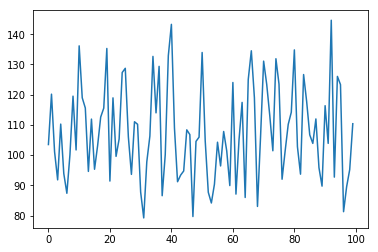

In [125]:
rrr = FinalWealth(pmt, 100, 0.43)
plt.plot(rrr)
plt.show()

## Simulación de la riqueza a través del tiempo

In [ ]:
def drift(param, prop):
    return param['r'] + prop*(param['mu'] - param['r'])

In [42]:
def PortfolioPath(param, N_steps, prop):
    dt = float(param['T'])/N_steps
    P = [[0.0]*(N_steps+1), [param['X0']]*(N_steps+1)]
    
    for i in range(N_steps+1):
        P[0][i] = P[0][i-1] + dt
        P[1][i] = P[1][i-1] + drift(param, prop)*dt + prop*param['sigma']*np.sqrt(dt)*rd.normalvariate(0, 1)
    return P

In [117]:
# Generamos N_path simulaciones del valor del portafolio

# Esta funcion retorna una lista que contiene la proporcion, la riqueza final media y la utilidad media
# dada una proporcion pi y simulando un numero N_path de caminos

def GeneratePaths(param, N_path, N_steps, prop):
    U = []
    XT = []
    
    for i in range(N_path):
        temp = PortfolioPath(param, N_steps, prop)
        XT.append(temp[1][-1]) # POR FAVOR QUE SEA ESTO
        U.append(Utility(param, XT[i]))
        
    return prop, np.mean(XT), np.mean(U) #path, np.mean(U)

In [106]:
# Definimos la funcion que nos calcula la utilidad esperada para cada pi

def MaximumProportion(param, N_path, N_steps):
    start = time.time()
    proportion = [i/100 for i in range(101)]
    res_x = []
    res_u = []
    for i in range(len(proportion)):
        temp_prop, temp_x, temp_u = GeneratePaths(param, N_path, N_steps, proportion[i])
        res_x.append(temp_x)
        res_u.append(temp_u)
        
    max_idx = sorted(range(len(res_u)), key=lambda i: res_u[i])[-5:]
    max_res = []
    for j in max_idx:
        max_row = [proportion[j], res_x[j], res_u[j]]
        max_res.append(max_row)
    print(time.time() - start)
        
    return max_res

Ahora simulamos N_path$ = 500$ simulaciones para múltiples estrategias: $$\pi = [0.00, 0.01, 0.02, \dots, 0.99, 1.00]$$

In [107]:
N_paths = 10000
N_step  = 100

In [112]:
tsst = PortfolioPath(pmt, N_step, 0.43)
np.shape(tsst)
#print(tsst[1])

(2, 101)

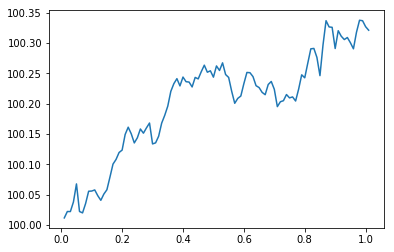

100.01179846012259

In [120]:
plt.plot(tsst[0], tsst[1])
plt.show()
tsst[-1][0]

In [118]:
test = MaximumProportion(pmt, N_paths, N_step)

258.35882568359375


In [119]:
test
#len(test[:][0]), len(test[0][:]), len(test[:][:])
#test[1]

[[0.97, 100.1008601100492, 12.652285023624099],
 [0.82, 100.10265438242516, 12.652345966715863],
 [1.0, 100.10335554911069, 12.652362968683207],
 [0.99, 100.10469308248445, 12.652405725153582],
 [0.92, 100.10592293333958, 12.652446002223709]]

In [75]:
test[:][2]

[0.02, 100.030164547364, 12.650064380852873]